In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')

df4 = pd.concat([df1, df2,df3])
print(df4.head())

  country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                2019.0                  NaN                 NaN   
1         

In [3]:
df4.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df4.shape

(13298, 27)

In [5]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

In [6]:
df4.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

# Drop all the columns

In [7]:
df4.drop(['country', 'country_long'], inplace= True, axis= 1)


In [8]:
df4.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source'], inplace= True, axis= 1)


In [9]:
df4.drop(['year_of_capacity_data'], inplace= True, axis= 1)


In [10]:
df4.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               6
latitude                 78
longitude                78
primary_fuel           2004
commissioning_year     2644
owner                   593
generation_gwh_2013    6128
generation_gwh_2014    5764
generation_gwh_2015    5305
generation_gwh_2016    4597
generation_gwh_2017    4006
generation_gwh_2018    3440
generation_gwh_2019    3520
dtype: int64

In [11]:
df4['generation_gwh_2013'].fillna(value=df4['generation_gwh_2013'].median(), inplace= True)
df4['generation_gwh_2014'].fillna(value=df4['generation_gwh_2014'].median(), inplace= True)
df4['generation_gwh_2015'].fillna(value=df4['generation_gwh_2015'].median(), inplace= True)
df4['generation_gwh_2016'].fillna(value=df4['generation_gwh_2016'].median(), inplace= True)
df4['generation_gwh_2017'].fillna(value=df4['generation_gwh_2017'].median(), inplace= True)

In [12]:
df4['latitude'].fillna(value=df4['latitude'].mean(), inplace= True)
df4['longitude'].fillna(value=df4['longitude'].mean(), inplace= True) 

In [13]:
df4.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               6
latitude                  0
longitude                 0
primary_fuel           2004
commissioning_year     2644
owner                   593
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018    3440
generation_gwh_2019    3520
dtype: int64

In [14]:
df4['generation_gwh_2018'] = pd.to_numeric(df4['generation_gwh_2018'], errors='coerce').fillna(0)


In [15]:
df4['generation_gwh_2019'] = pd.to_numeric(df4['generation_gwh_2019'], errors='coerce').fillna(0)


In [16]:
df4['primary_fuel'] = pd.to_numeric(df4['primary_fuel'], errors='coerce').fillna(0)


In [17]:
df4.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               6
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year     2644
owner                   593
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
dtype: int64

# EDA

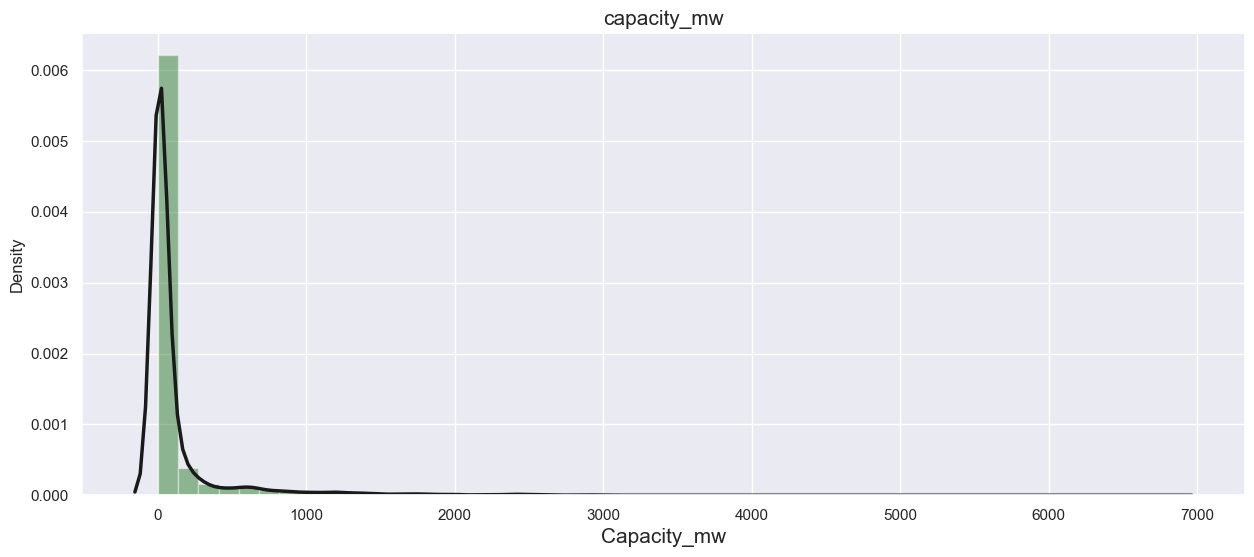

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(df4['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()


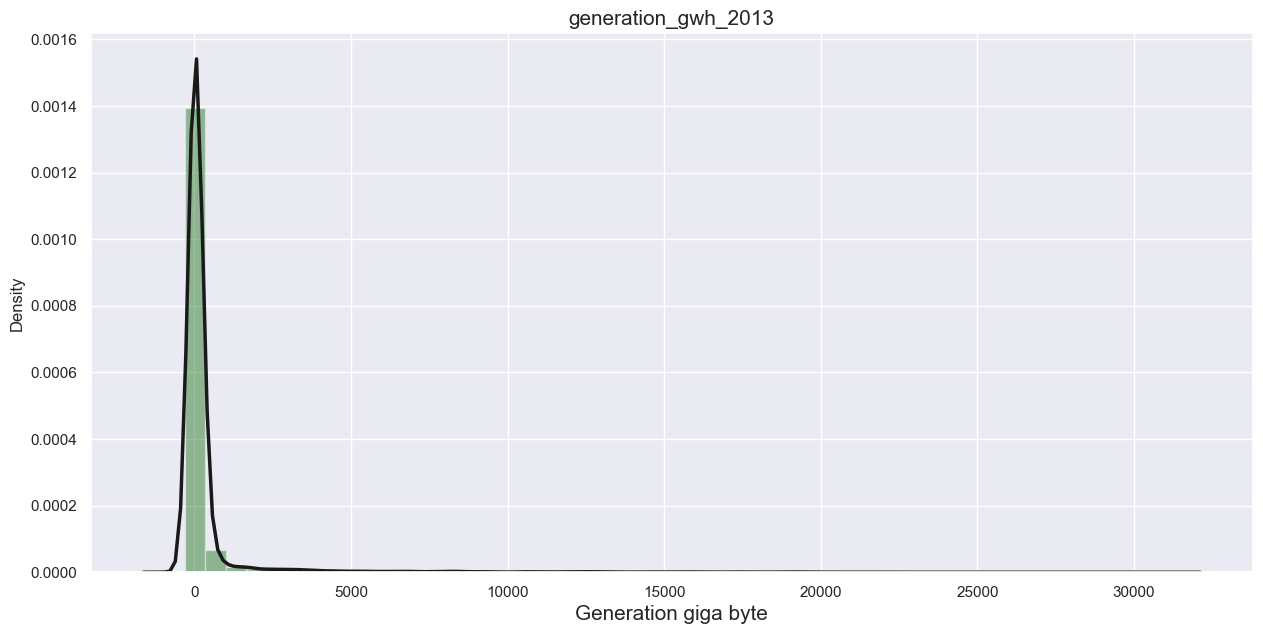

In [19]:
plt.figure(figsize=(15,7))

sns.distplot(df4['generation_gwh_2013'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2013', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

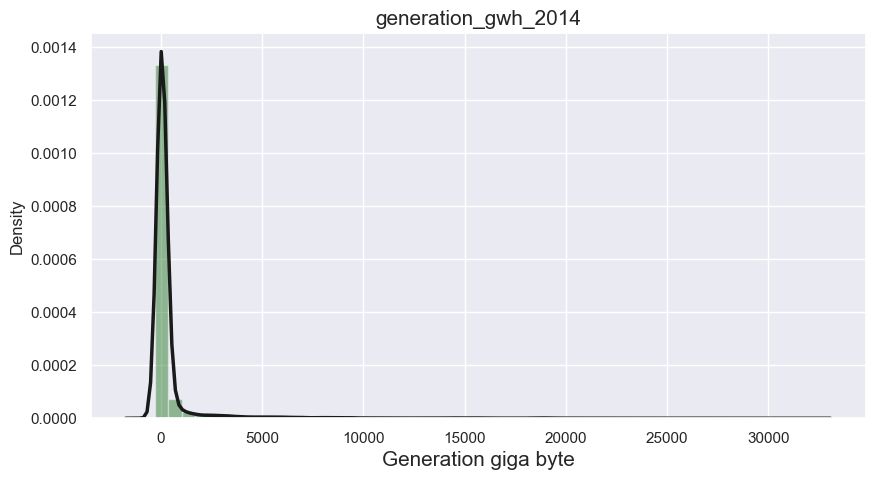

In [20]:
plt.figure(figsize=(10,5))

sns.distplot(df4['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


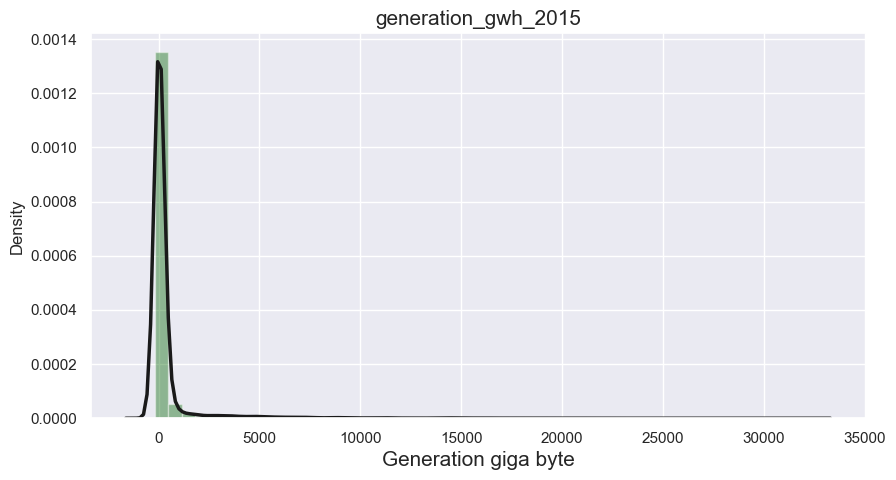

In [21]:
plt.figure(figsize=(10,5))

sns.distplot(df4['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

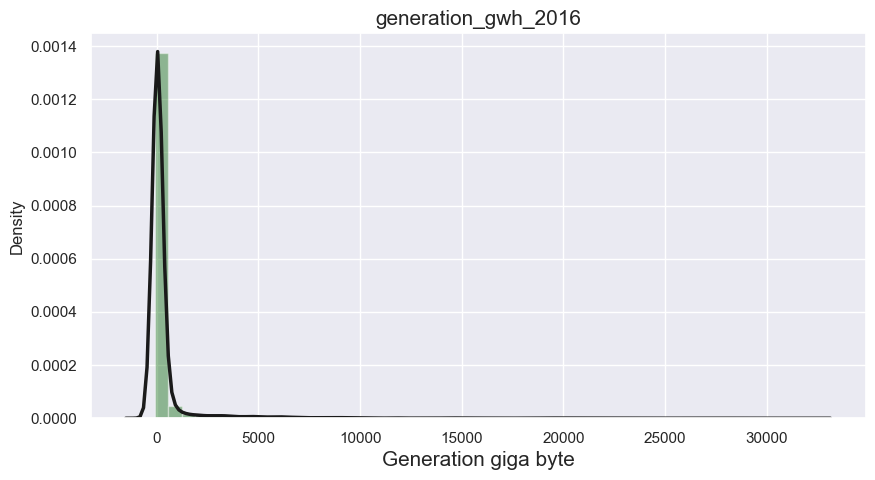

In [22]:
plt.figure(figsize=(10,5))

sns.distplot(df4['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

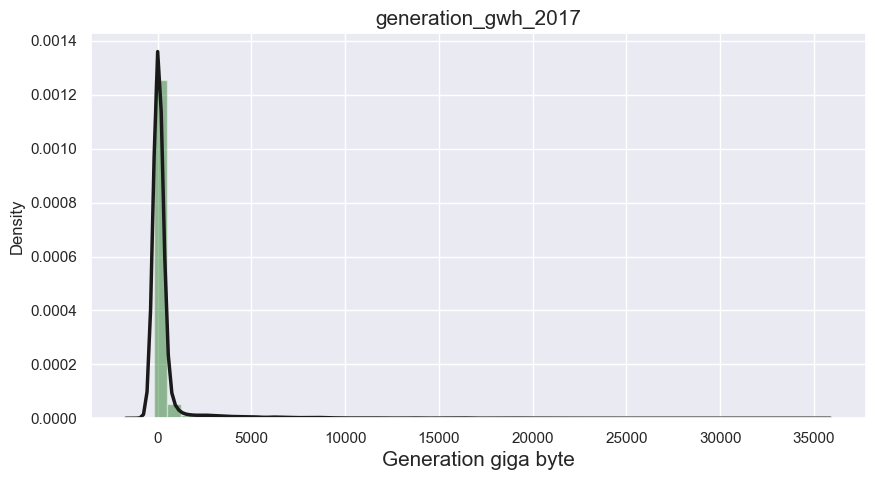

In [23]:
plt.figure(figsize=(10,5))

sns.distplot(df4['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


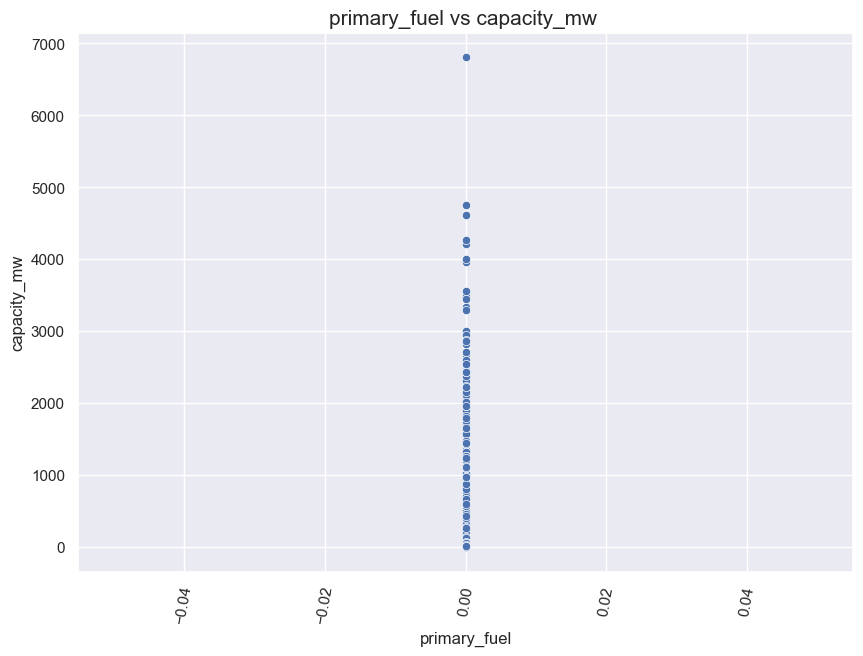

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df4, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


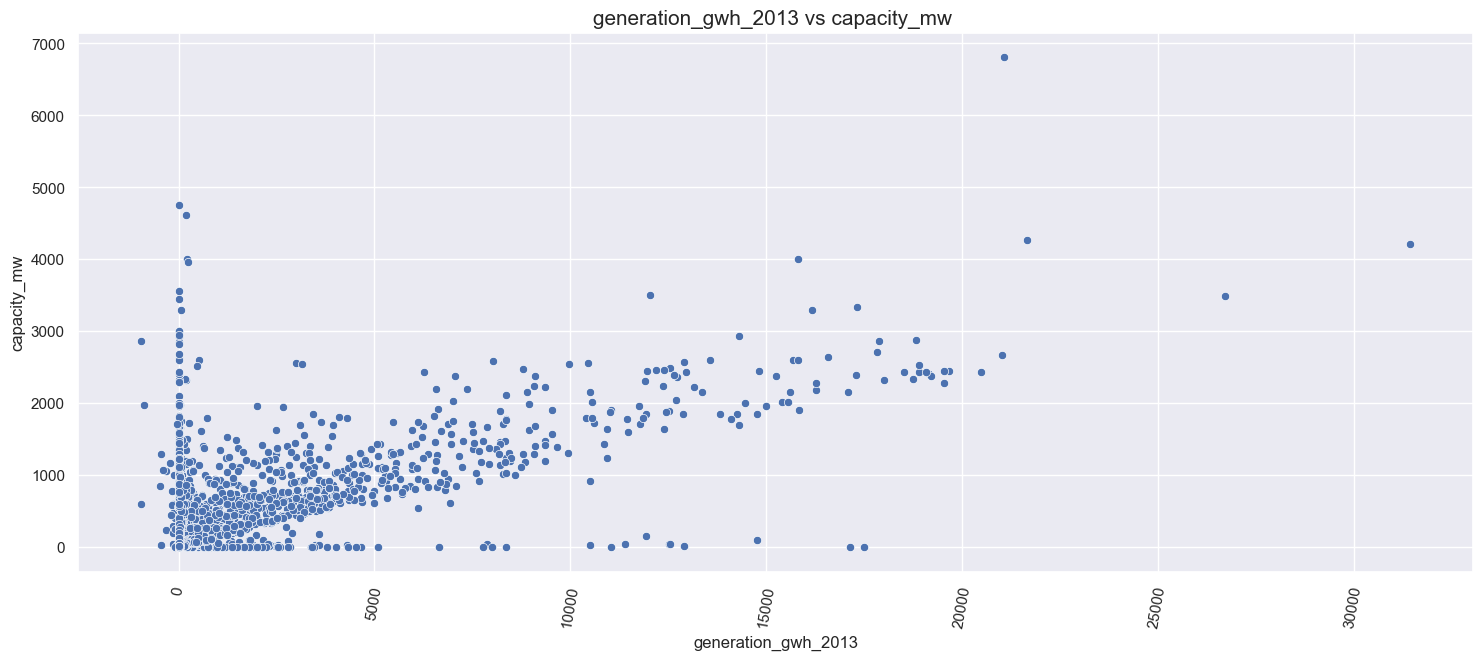

In [25]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='generation_gwh_2013',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2013 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

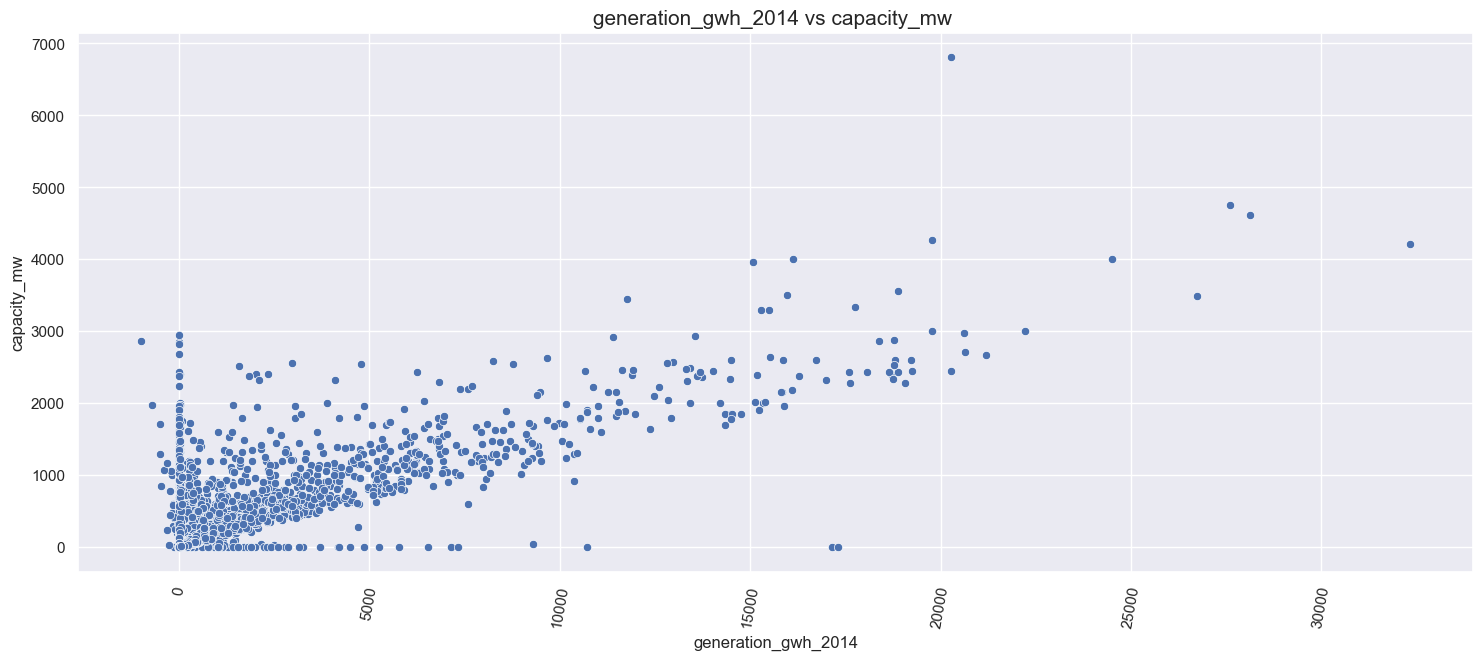

In [26]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

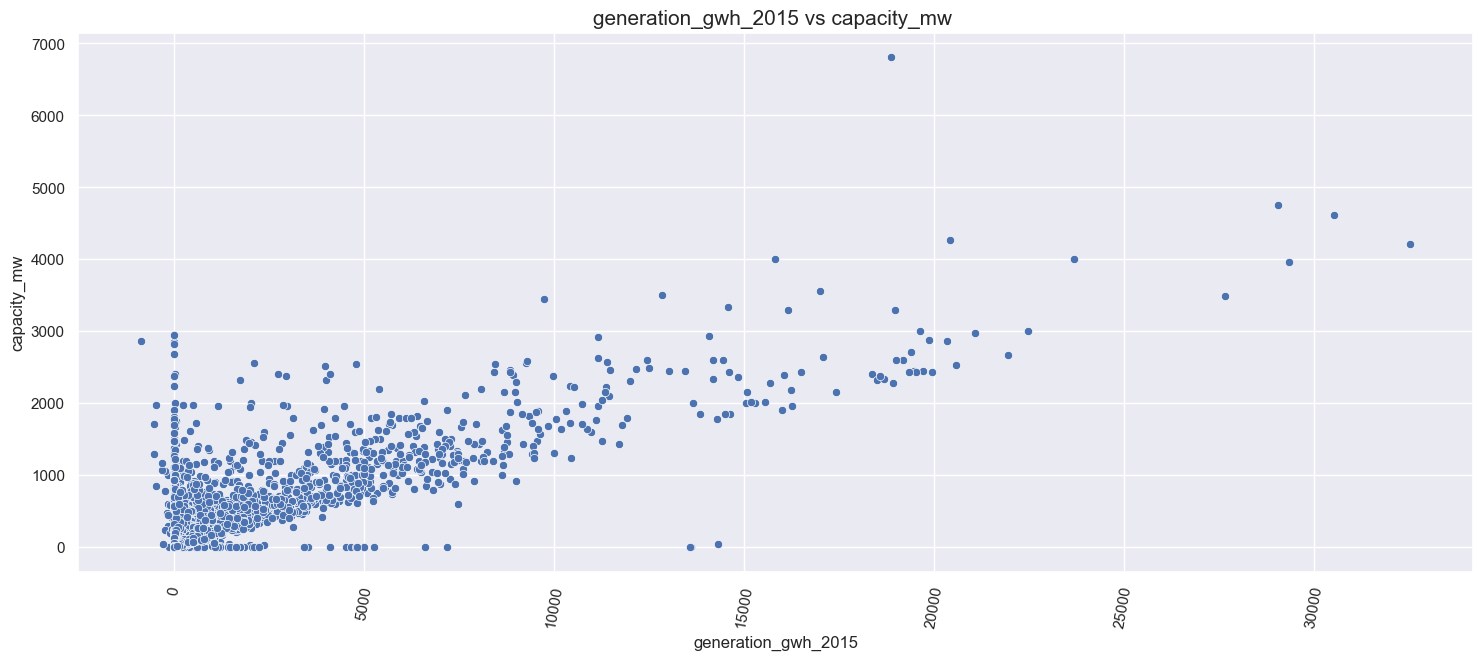

In [27]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


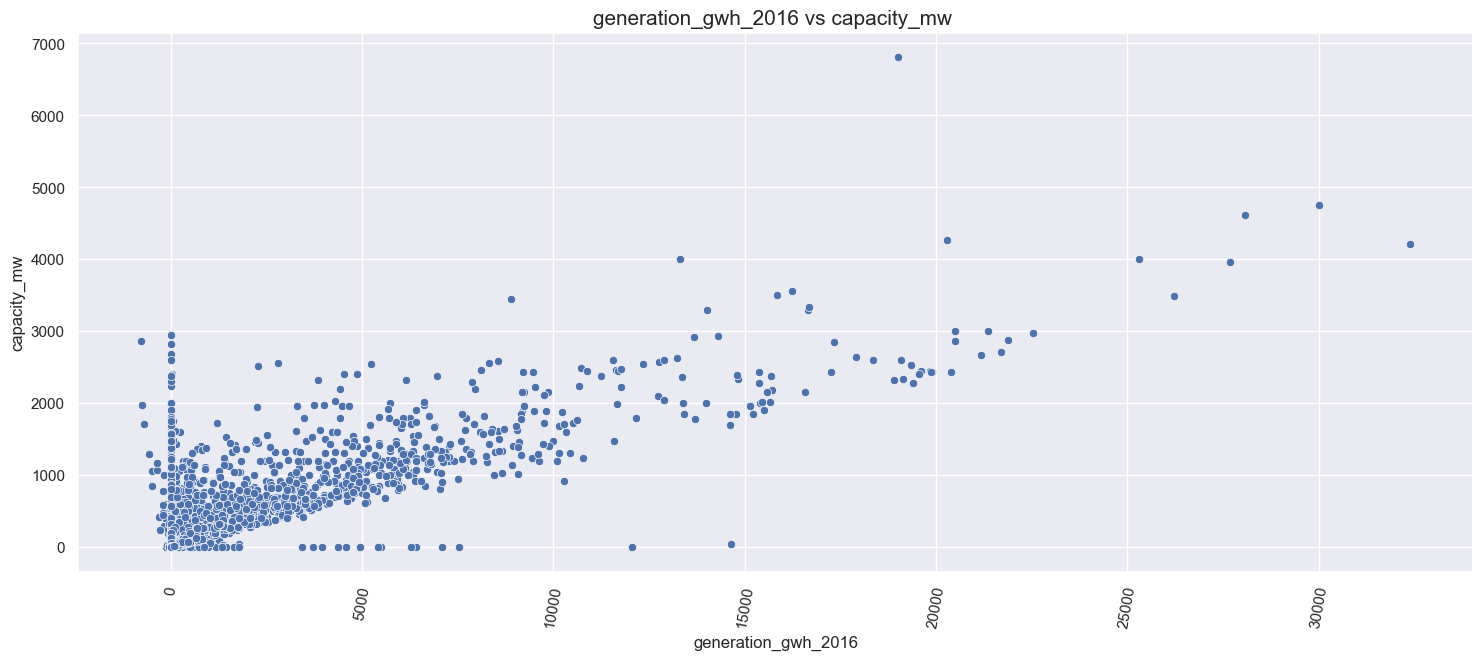

In [28]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

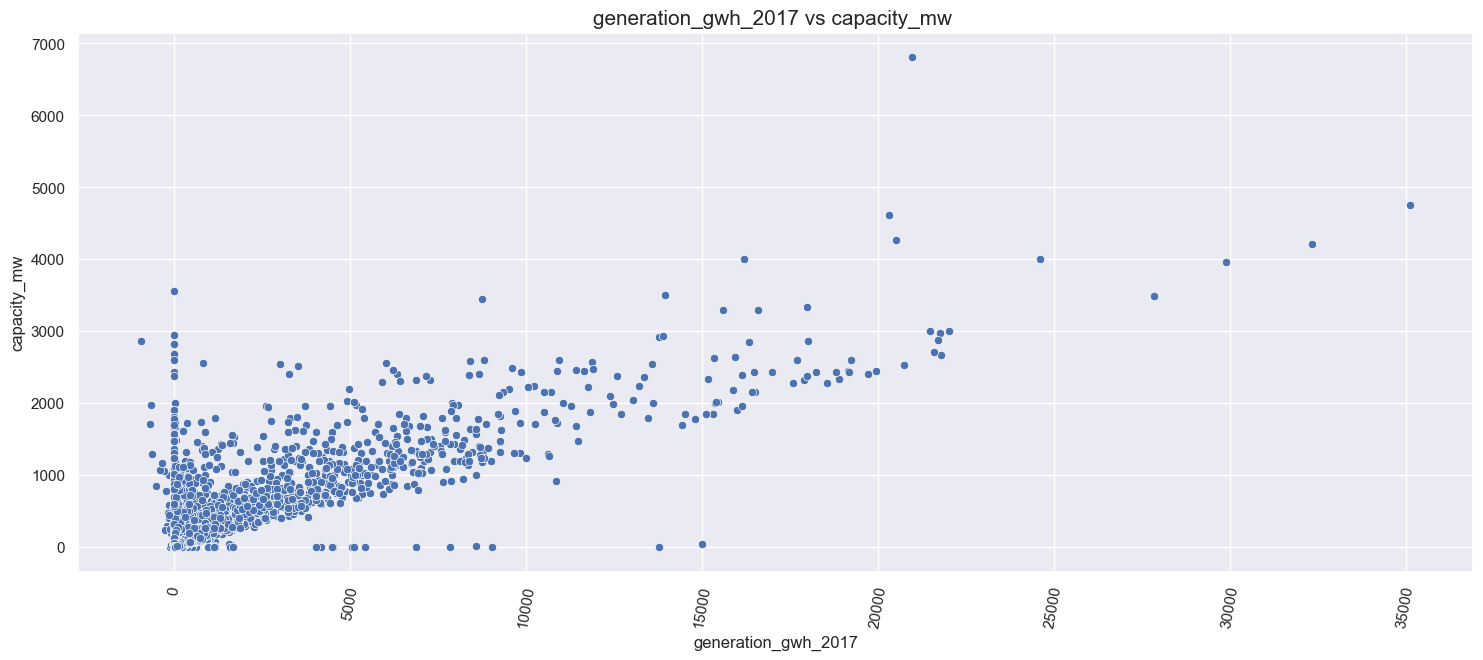

In [29]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

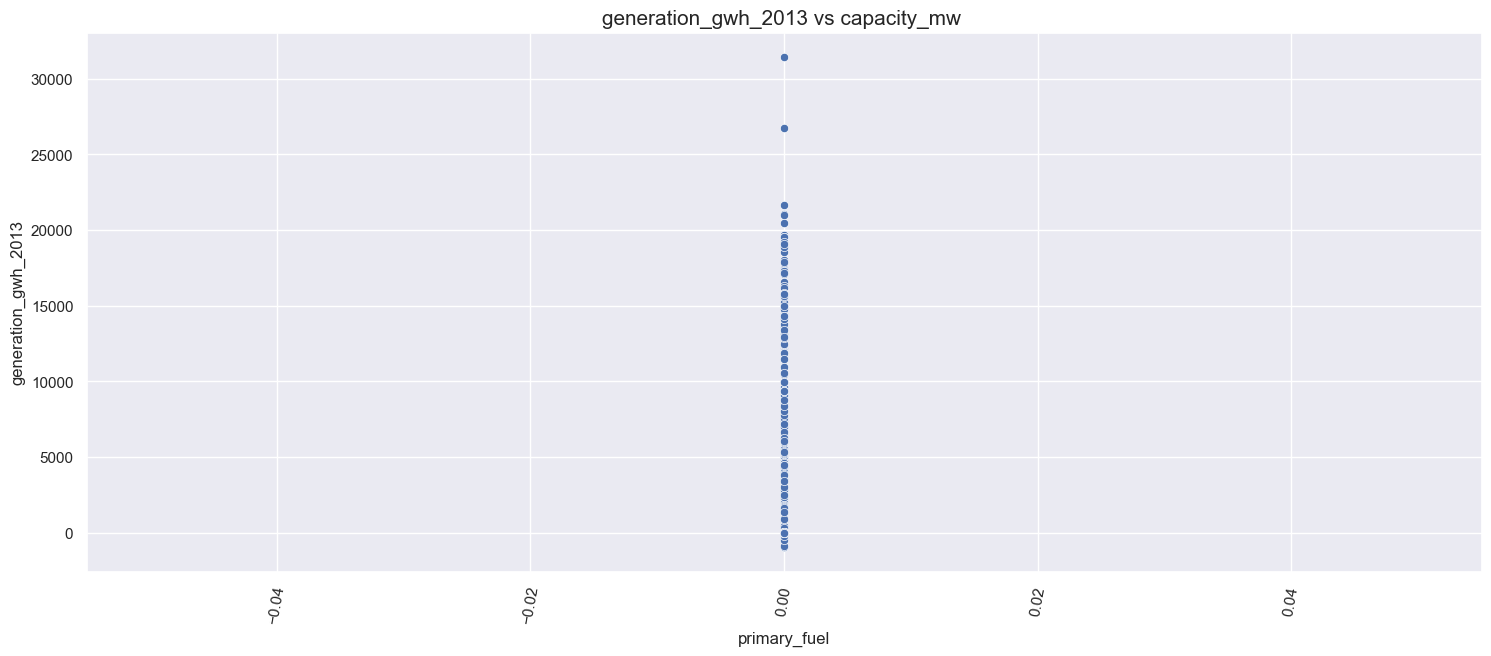

In [30]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='primary_fuel',y='generation_gwh_2013')
locs, labels = plt.xticks()
plt.title('generation_gwh_2013 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


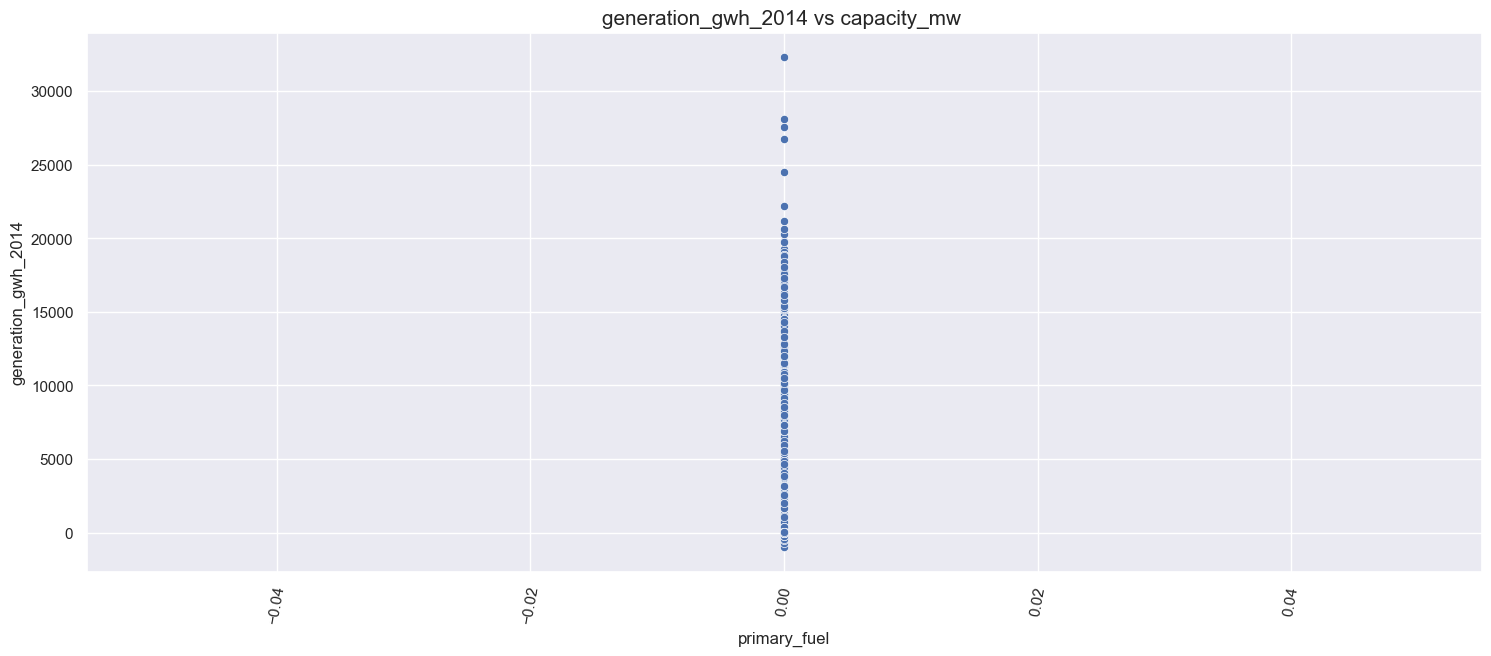

In [31]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='primary_fuel',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

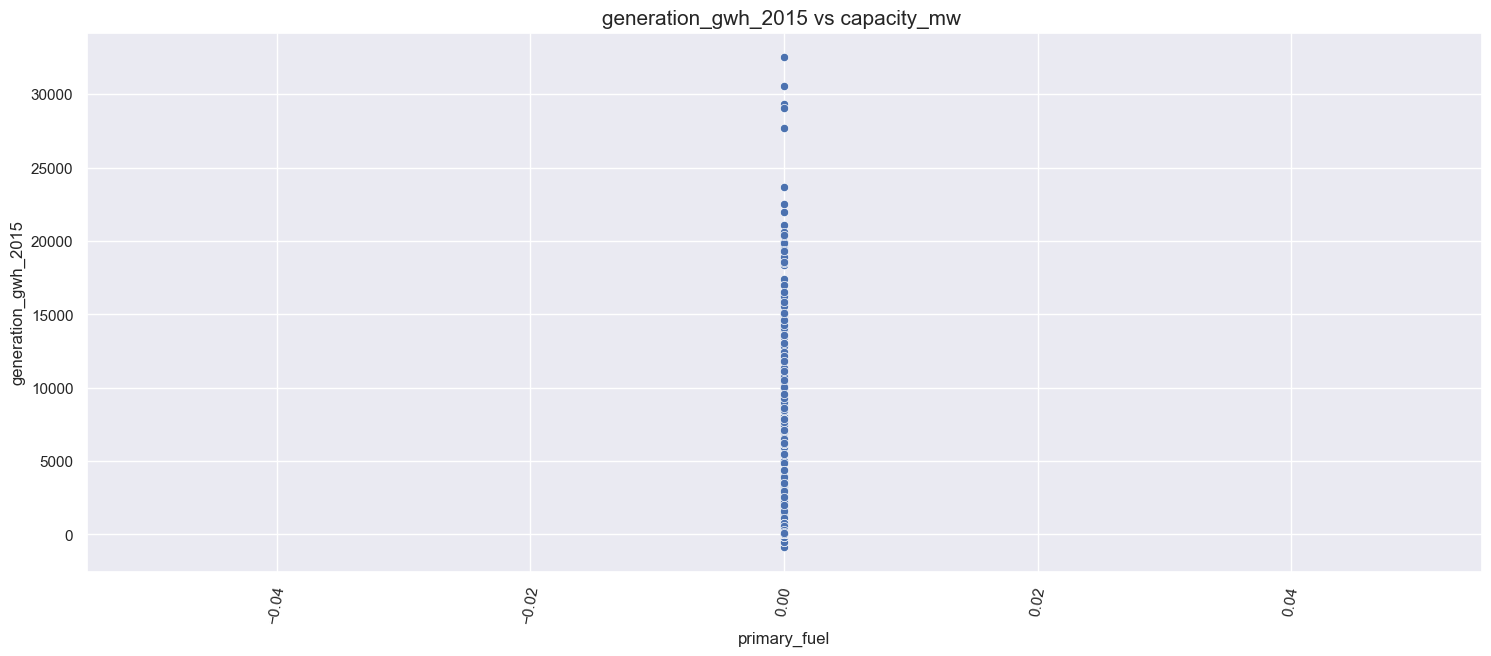

In [32]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='primary_fuel',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


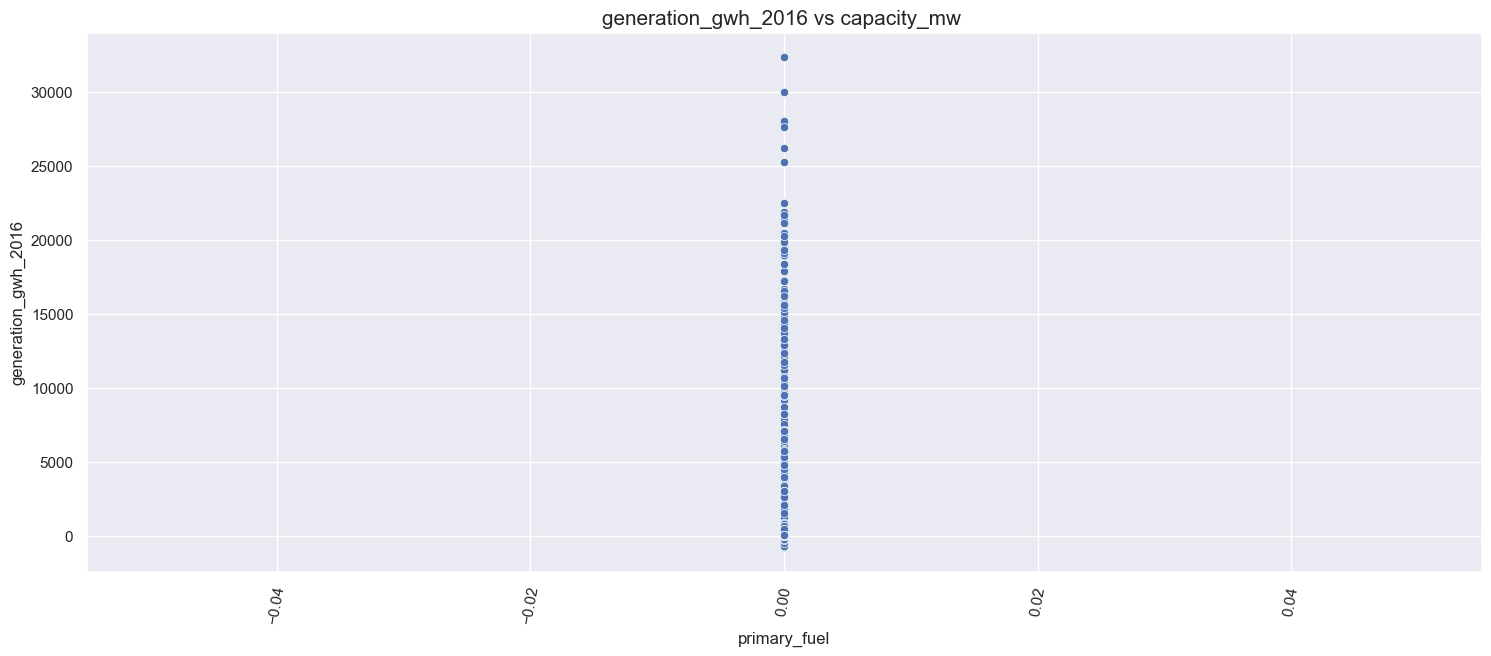

In [33]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='primary_fuel',y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


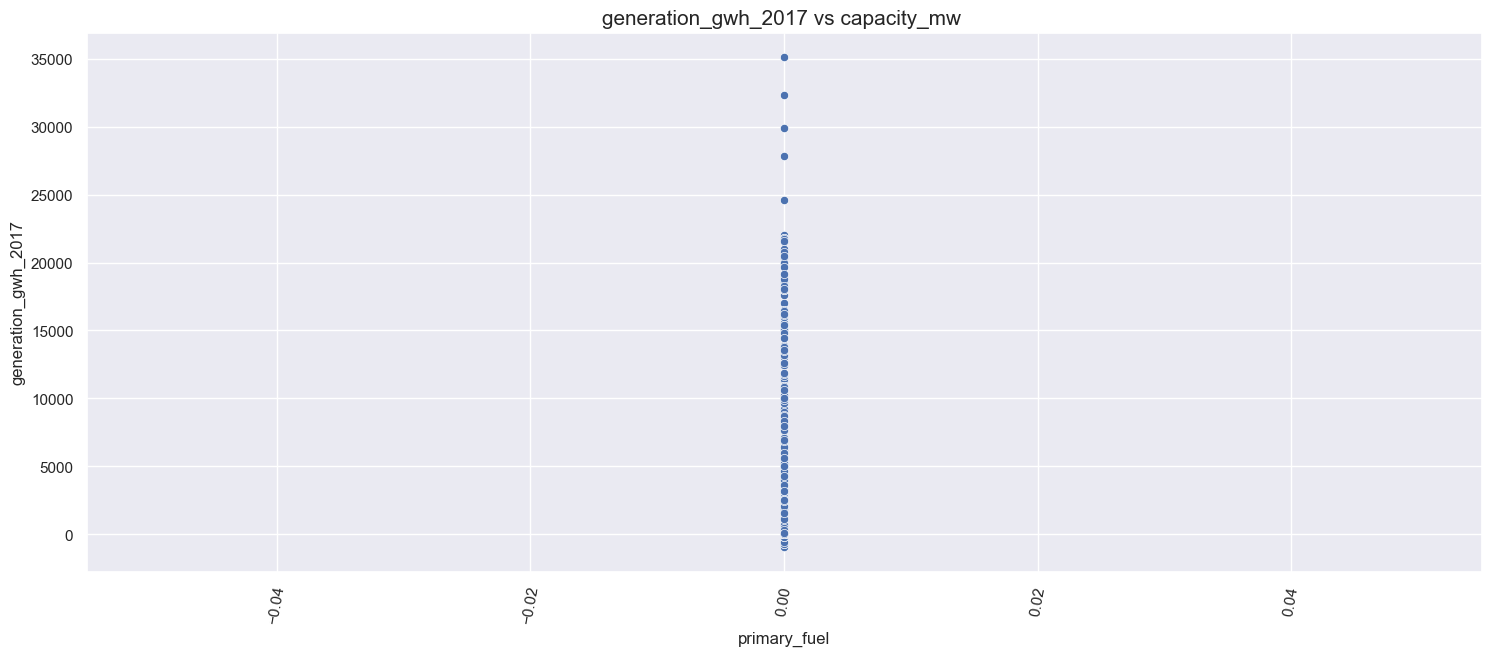

In [34]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df4, x='primary_fuel',y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


In [35]:
df4.head(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,0.0,2011.0,Adelaide Airport Ltd,21.3845,22.241,19.504,15.410278,13.433861,0.0,0.0
1,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,0.0,NaN,Adelaide Showgrounds,21.3845,22.241,19.504,15.410278,13.433861,0.0,0.0


# Data Processing


In [36]:
df4.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)


# LabelEncoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df4['primary_fuel']=le.fit_transform(df4['primary_fuel'])

In [38]:
df4.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,0,21.384500,22.241000,19.504000,15.410278,13.433861,0.000000,0.0
1,1.00,-34.9453,138.5882,0,21.384500,22.241000,19.504000,15.410278,13.433861,0.000000,0.0
2,21.60,-35.0641,117.7977,0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0.0


In [39]:
df4.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,-0.081161,0.127778,NaN,0.667354,0.795620,0.814138,0.813787,0.812690,0.822191,0.725020
latitude,-0.081161,1.000000,-0.775317,NaN,-0.023286,-0.051844,-0.054587,-0.058192,-0.059873,-0.059634,0.028914
longitude,0.127778,-0.775317,1.000000,NaN,0.004497,0.091979,0.097258,0.103468,0.108913,0.111359,-0.060922
primary_fuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.667354,-0.023286,0.004497,NaN,1.000000,0.827239,0.800063,0.767244,0.769788,0.739656,0.838631
generation_gwh_2014,0.795620,-0.051844,0.091979,NaN,0.827239,1.000000,0.969961,0.937811,0.919601,0.912843,0.755944
generation_gwh_2015,0.814138,-0.054587,0.097258,NaN,0.800063,0.969961,1.000000,0.964323,0.942955,0.941787,0.765599
generation_gwh_2016,0.813787,-0.058192,0.103468,NaN,0.767244,0.937811,0.964323,1.000000,0.969369,0.956267,0.761801
generation_gwh_2017,0.812690,-0.059873,0.108913,NaN,0.769788,0.919601,0.942955,0.969369,1.000000,0.966072,0.764693
generation_gwh_2018,0.822191,-0.059634,0.111359,NaN,0.739656,0.912843,0.941787,0.956267,0.966072,1.000000,0.756861


<Axes: >

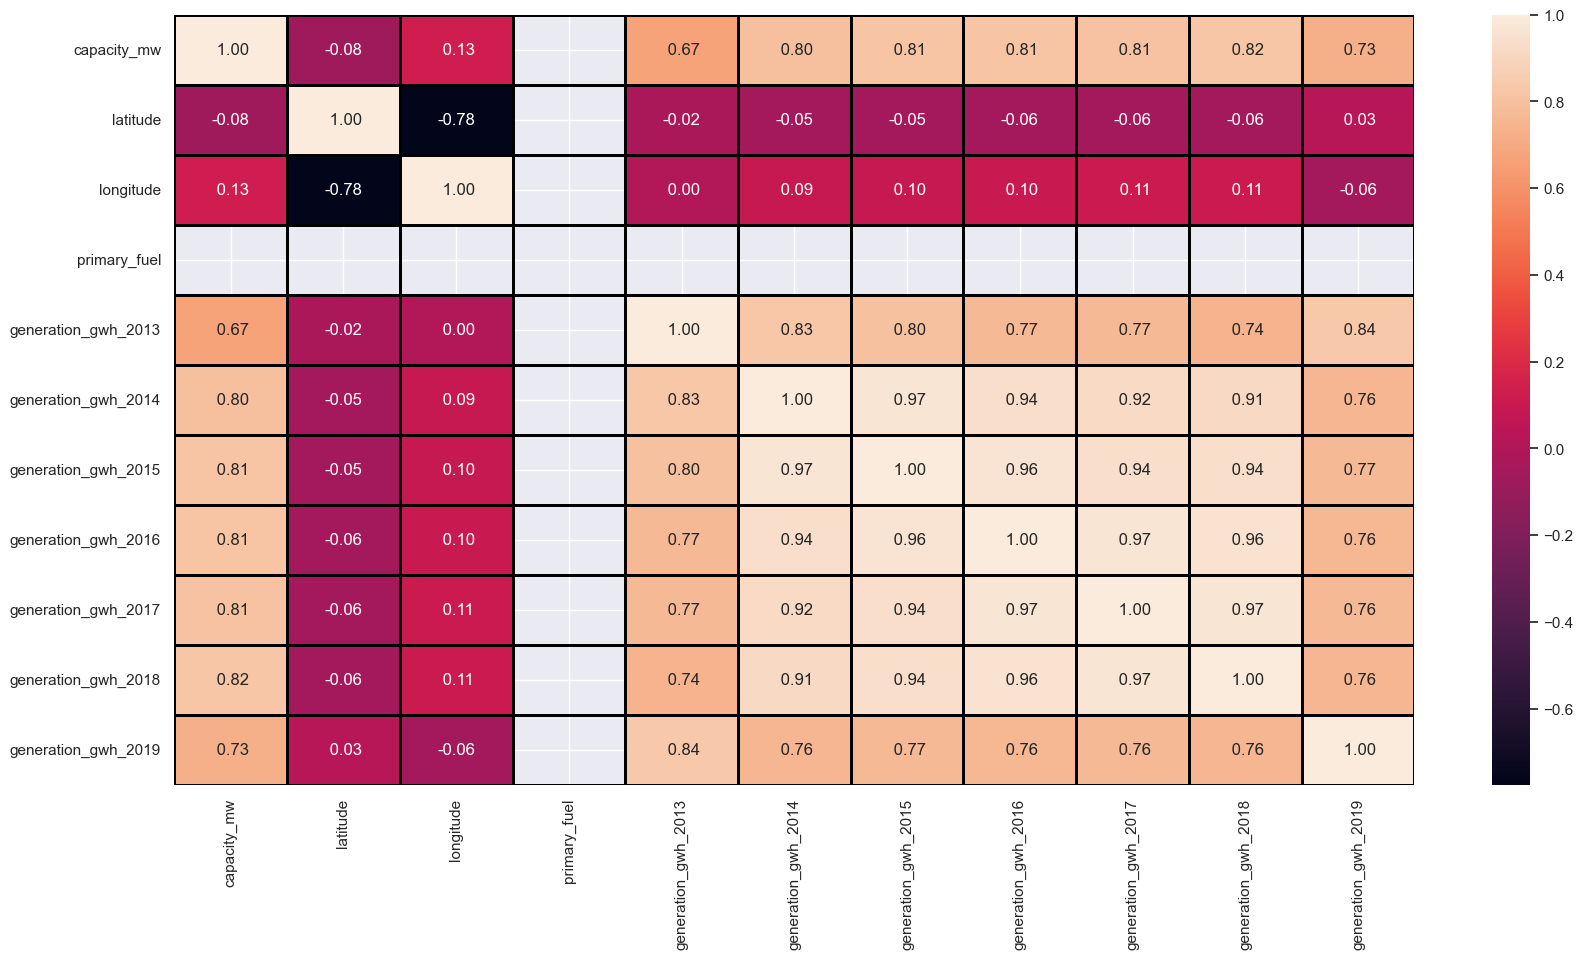

In [40]:
plt.figure(figsize=(20,10))

sns.heatmap(df4.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

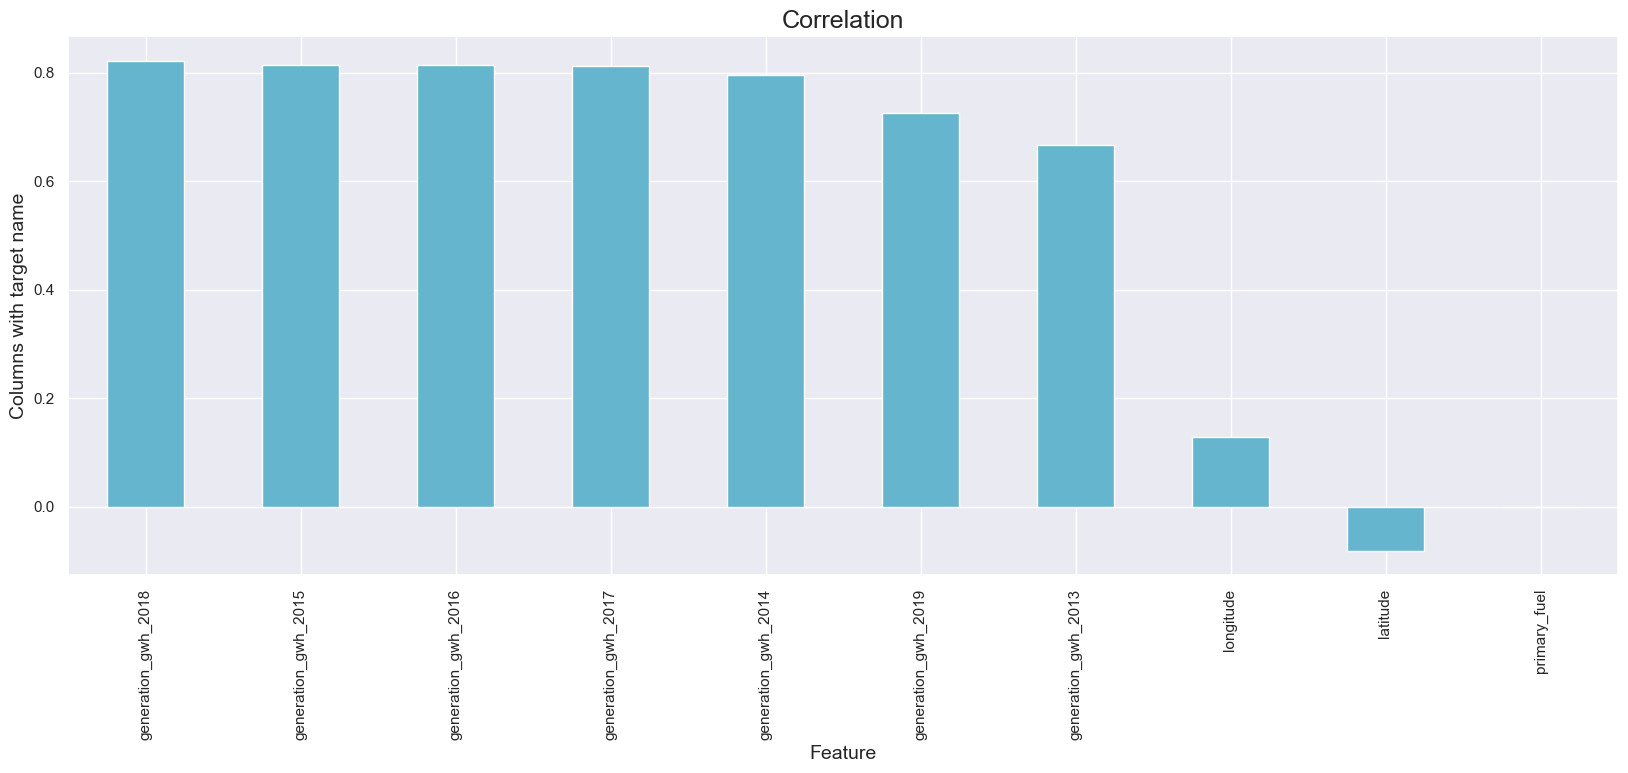

In [41]:
plt.figure(figsize=(20,7))
df4.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Checking outliers


<Axes: >

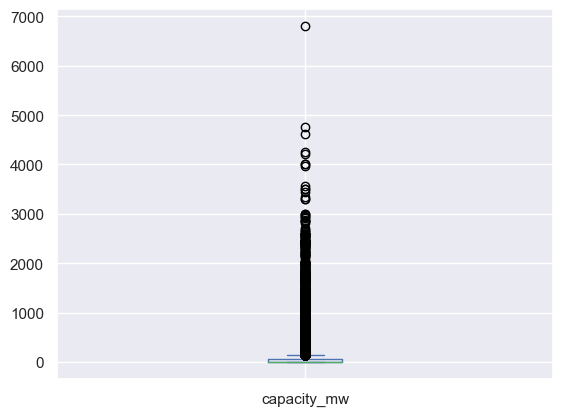

In [42]:
df4['capacity_mw'].plot.box()


<Axes: >

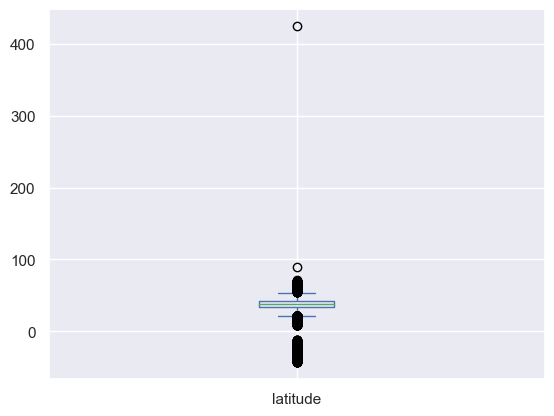

In [43]:
df4['latitude'].plot.box()


<Axes: >

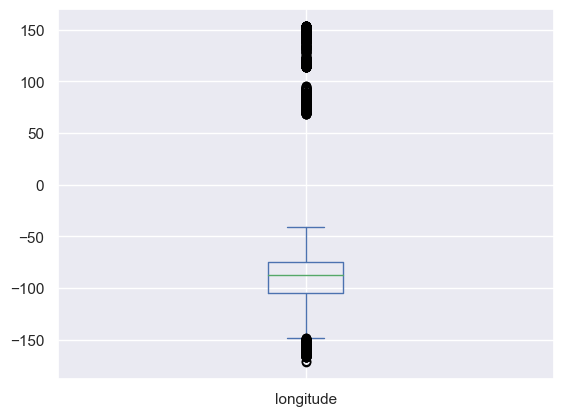

In [44]:
df4['longitude'].plot.box()


<Axes: >

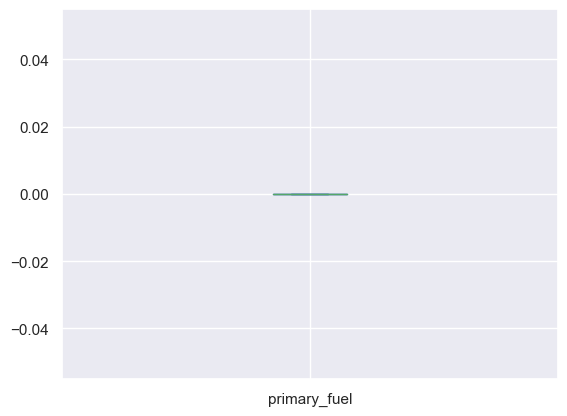

In [45]:
df4['primary_fuel'].plot.box()


<Axes: >

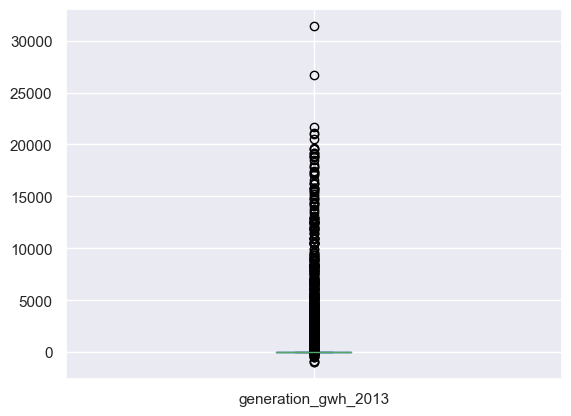

In [46]:
df4['generation_gwh_2013'].plot.box()


<Axes: >

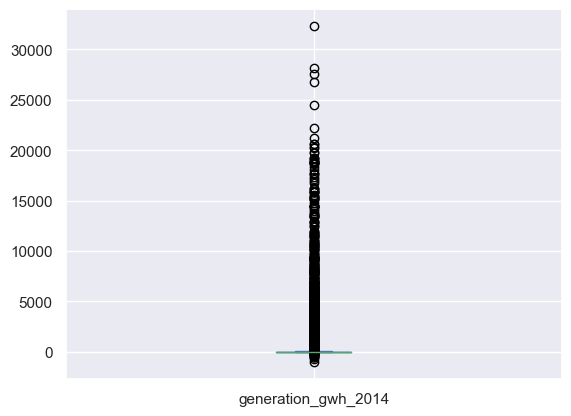

In [47]:
df4['generation_gwh_2014'].plot.box()


<Axes: >

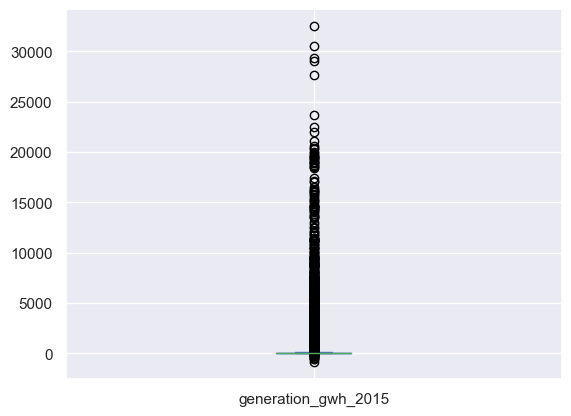

In [48]:
df4['generation_gwh_2015'].plot.box()


<Axes: >

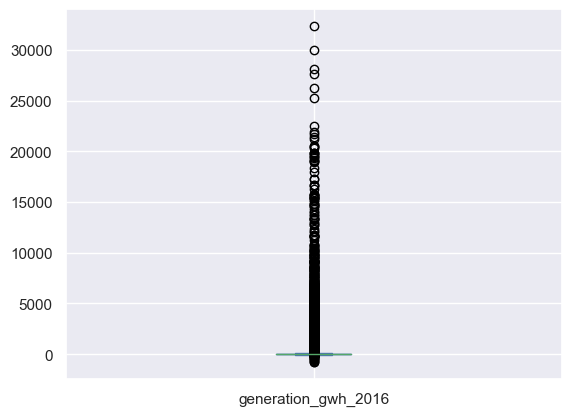

In [49]:
df4['generation_gwh_2016'].plot.box()


<Axes: >

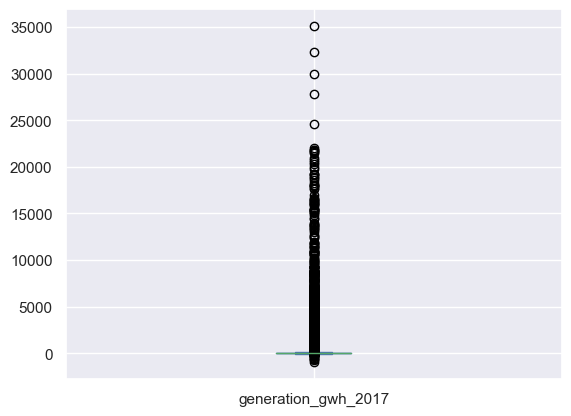

In [50]:
df4['generation_gwh_2017'].plot.box()


# OUTLIER HANDLING

In [51]:
from scipy.stats import zscore
z= np.abs(zscore(df4))

In [52]:
threshold= 3 
print(np.where(z>3))

(array([    0,     0,     1, ..., 13162, 13260, 13265], dtype=int64), array([ 1,  2,  1, ..., 10,  2, 10], dtype=int64))


In [53]:
df=df4[(z<3).all(axis=1)]
print(df4.shape)
print(df4.shape)

(13298, 11)
(13298, 11)


In [54]:
Loss_percentage=(908-866)/908*100
print(Loss_percentage)

4.6255506607929515


In [55]:
df4.shape

(13298, 11)

# Removing skewness


In [56]:
df4.skew()

capacity_mw            5.473446
latitude              -1.864012
longitude              2.331246
primary_fuel           0.000000
generation_gwh_2013    8.545859
generation_gwh_2014    8.089869
generation_gwh_2015    8.230533
generation_gwh_2016    8.288579
generation_gwh_2017    8.365803
generation_gwh_2018    8.293077
generation_gwh_2019    8.882780
dtype: float64

In [57]:
from sklearn.preprocessing import power_transform 
x=df4.drop(['capacity_mw'], axis=1)
y=df4.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [58]:
x=pd.DataFrame(data=x)


# Scaling the data Using StandardScaler.


In [59]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
x=SDc.fit_transform(x)

# VIF

In [60]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
df4.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [61]:
df4=pd.DataFrame(data=df4, columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [62]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [63]:
calc_vif(df4)


,variables,VIF FACTOR
0,latitude,5.555831
1,longitude,5.497589
2,primary_fuel,NaN
3,generation_gwh_2013,3.451769
4,generation_gwh_2014,20.300625
5,generation_gwh_2015,30.650974
6,generation_gwh_2016,28.333202
7,generation_gwh_2017,18.055966


In [64]:
df4.drop('generation_gwh_2016', axis=1, inplace=True )


In [65]:
calc_vif(df4)


,variables,VIF FACTOR
0,latitude,5.554344
1,longitude,5.495358
2,primary_fuel,NaN
3,generation_gwh_2013,3.405502
4,generation_gwh_2014,20.274296
5,generation_gwh_2015,24.855770
6,generation_gwh_2017,9.581308


In [66]:
import numpy as np

arr1 = np.random.rand(13298, 10)
arr2 = np.random.rand(13298, 5)

combined = np.concatenate((arr1, arr2), axis=1) 


In [67]:
x=df4
y=['df4']

# MODEL BUILDING

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df4 = pd.DataFrame({
    'feature1': np.random.rand(13298),
    'feature2': np.random.rand(13298),
    'target': np.random.rand(13298)
})
x = df4[['feature1', 'feature2']] 
y = df4['target']

print(x.shape)  
print(y.shape)  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)


(13298, 2)
(13298,)


In [70]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= 42,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 0 The model perform very well
At random State: 0
Training r2_score 0.009547427365996786
Testing r2 score  -0.045639268575481395
At Random state 1 The model perform very well
At random State: 1
Training r2_score 0.009547427365996786
Testing r2 score  -0.045639268575481395
At Random state 2 The model perform very well
At random State: 2
Training r2_score 0.009547427365996786
Testing r2 score  -0.045639268575481395
At Random state 3 The model perform very well
At random State: 3
Training r2_score 0.009547427365996786
Testing r2 score  -0.045639268575481395
At Random state 4 The model perform very well
At random State: 4
Training r2_score 0.009547427365996786
Testing r2 score  -0.045639268575481395
At Random state 5 The model perform very well
At random State: 5
Training r2_score 0.009547427365996786
Testing r2 score  -0.045639268575481395
At Random state 6 The model perform very well
At random State: 6
Training r2_score 0.009547427365996786
Testing r2 score  -0.04563926857

At random State: 499
Training r2_score 0.014840471869292937
Testing r2 score  0.03761252133791526

In [71]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 499)


In [72]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.00016417461844964176


# Cross Validation 


In [73]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 0.0029488851996106735 and Accuracy score is 0.016417461844964176
At cross fold 3 the Cross Val score is -0.022974156877978803 and Accuracy score is 0.016417461844964176
At cross fold 4 the Cross Val score is -0.08154816280649957 and Accuracy score is 0.016417461844964176
At cross fold 5 the Cross Val score is -0.08049264933977618 and Accuracy score is 0.016417461844964176
At cross fold 6 the Cross Val score is -0.05108173619704689 and Accuracy score is 0.016417461844964176
At cross fold 7 the Cross Val score is -0.028541406927116784 and Accuracy score is 0.016417461844964176
At cross fold 8 the Cross Val score is -0.0757064548286765 and Accuracy score is 0.016417461844964176
At cross fold 9 the Cross Val score is -0.07721629139186219 and Accuracy score is 0.016417461844964176


In [74]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 0.25049831034386283
Mean Squared Error: 0.08416637510288413
Root Mean Square Error: 0.29011441726133524


# LASSO

In [75]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: -0.01603721153273785
Cross val Score : -0.08345811796373337


In [76]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 0.2505495856109419
Mean Squared Error: 0.0841936955103351
Root Mean Square Error: 0.2901614990144887


# RIDGE

In [77]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  0.01638910467491872
Cross val Score -0.0756939596728845


In [78]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 0.25049836369313705
Mean Squared Error: 0.08416639897400528
Root Mean Square Error: 0.29011445840220595


# DECISION TREEREGRESSOR

In [79]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: -107.65538901736309
Cross Val Score: -103.42486460129817


In [80]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 0.3428195476599286
Mean Squared Error: 0.17480471213862564
Root Mean Square Error: 0.4180965344733506


# KNEIGHBORS REGRESSORS

In [81]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: -20.844568830266198
Cross val Score : -19.489766102085515


In [82]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.26834558062848485
Mean Squared Error: 0.10172719411642486
Root Mean Square Error: 0.31894700832023


# ENSEMBLE TECHNIQUES

In [85]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: -16.932620843143464
Cross val Score : -16.643908880616355


In [86]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.2643747730633398
Mean Squared Error: 0.09843410865870489
Root Mean Square Error: 0.3137421053328751


# GRADIENT BOOSTING REGRESSOR

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: -16.932620843143464
Cross val Score : -0.829560715613295


In [131]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.2643747730633398
Mean Squared Error: 0.09843410865870489
Root Mean Square Error: 0.3137421053328751
